<a href="https://colab.research.google.com/github/Prattoypaul/deeplearning/blob/machinel/img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt
import  numpy as np
import os
import matplotlib.image as mpimg

In [36]:
import cv2
import PIL.Image as Image


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import tensorflow_hub as hub

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 38kB/s 


In [ ]:
!nvidia-smi

Sat Jun 26 14:04:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
CATEGORIES=['sakib','ronaldo','Musfiq','messi',]

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
img_size=[244,244]
img_dir='/content/gdrive/MyDrive/Colab Notebooks/project2/players'

In [ ]:
inception=InceptionV3(input_shape=img_size+[3],weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
img_shape=(224,224)

In [ ]:
data=[]
for Catagories in CATEGORIES:
  Folder=os.path.join(img_dir,Catagories)
  label=CATEGORIES.index(Catagories)

  for img in os.listdir(Folder):
    image=os.path.join(Folder,img)
    
    image_arr=cv2.imread(image)
    
    try:
      image_arr=cv2.resize(image_arr,img_shape, interpolation=cv2.INTER_AREA)   
    except:
      break
    data.append([image_arr,label])

In [ ]:
from tensorflow import keras

In [ ]:
data_augmantation=keras.Sequential([
                                    layers.experimental.preprocessing.RandomFlip(),
                                    layers.experimental.preprocessing.RandomRotation(0.1),
                                    layers.experimental.preprocessing.RandomZoom(0.1)

])

In [ ]:
import random
random.shuffle(data)
x=[]
y=[]
for feature,label in data :
  x.append(feature)
  y.append(label)

x=np.array(x)
y=np.array(y)

x=x/255


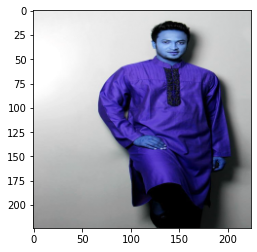

In [ ]:

plt.imshow(x[0])

In [ ]:
y[0]

0

In [ ]:
def plot_labal(x,y,i):
  plt.imshow(x[i])
  plt.xlabel(CATEGORIES[y[i]])

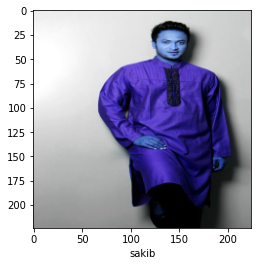

In [ ]:
plot_labal(x,y,0)

In [ ]:
x.shape

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
ann=models.Sequential([
                       data_augmantation,
                       layers.Flatten(input_shape=(224,224,3)),
                       layers.Dense(3000,activation='relu'),
                       layers.Dense(1000,activation='relu'),
                       layers.Dense(10,activation='softmax'),
])
ann.compile(
    optimizer='SGD',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
ann.fit(xtrain,ytrain,epochs=10)

In [ ]:
cnn=models.Sequential([
                       data_augmantation,
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
                       layers.MaxPool2D((2,2)),
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                       layers.MaxPool2D((2,2)),

                       layers.Flatten(),
                       layers.Dense(1000,activation='relu'),
                       layers.Dense(10,activation='softmax')
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
cnn.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
10/10 [==============================] - 30s 105ms/step - loss: 12.4481 - accuracy: 0.2785
Epoch 2/50
10/10 [==============================] - 1s 82ms/step - loss: 1.3321 - accuracy: 0.4195
Epoch 3/50
10/10 [==============================] - 1s 80ms/step - loss: 1.1696 - accuracy: 0.4765
Epoch 4/50
10/10 [==============================] - 1s 80ms/step - loss: 1.0700 - accuracy: 0.5336
Epoch 5/50
10/10 [==============================] - 1s 81ms/step - loss: 1.0358 - accuracy: 0.5638
Epoch 6/50
10/10 [==============================] - 1s 81ms/step - loss: 1.0248 - accuracy: 0.5470
Epoch 7/50
10/10 [==============================] - 1s 80ms/step - loss: 0.8609 - accuracy: 0.6040
Epoch 8/50
10/10 [==============================] - 1s 81ms/step - loss: 0.8257 - accuracy: 0.6443
Epoch 9/50
10/10 [==============================] - 1s 80ms/step - loss: 0.7901 - accuracy: 0.6342
Epoch 10/50
10/10 [==============================] - 1s 82ms/step - loss: 0.7394 - accuracy: 0.6946
Epoch 

In [26]:
cnn.evaluate(xtest,ytest)

5/5 [==============================] - 0s 40ms/step - loss: 1.6833 - accuracy: 0.6047


[1.6833230257034302, 0.604651153087616]

In [27]:
xtest[0]

array([[[0.93333333, 0.91764706, 0.89803922],
        [0.93333333, 0.91764706, 0.89803922],
        [0.93333333, 0.91764706, 0.89803922],
        ...,
        [0.03529412, 0.10980392, 0.09803922],
        [0.03529412, 0.10980392, 0.09803922],
        [0.03137255, 0.10588235, 0.09411765]],

       [[0.95686275, 0.94509804, 0.9254902 ],
        [0.95686275, 0.94509804, 0.9254902 ],
        [0.95686275, 0.94509804, 0.9254902 ],
        ...,
        [0.03529412, 0.10980392, 0.09803922],
        [0.03529412, 0.10980392, 0.09803922],
        [0.03137255, 0.10588235, 0.09411765]],

       [[0.97647059, 0.96470588, 0.94509804],
        [0.97647059, 0.96470588, 0.94509804],
        [0.97647059, 0.96470588, 0.94509804],
        ...,
        [0.03921569, 0.11372549, 0.10196078],
        [0.03529412, 0.10980392, 0.09803922],
        [0.03529412, 0.10980392, 0.09803922]],

       ...,

       [[0.58823529, 0.77254902, 0.76470588],
        [0.59215686, 0.76862745, 0.76470588],
        [0.60392157, 0

In [28]:
xtest.shape

(129, 224, 224, 3)

In [29]:
ypred=cnn.predict(xtest)
ypred_class=[np.argmax(i) for i in ypred]

In [30]:
ypred_class[:10]

[2, 3, 0, 1, 0, 2, 1, 1, 0, 2]

In [31]:
ytest[:10]

array([2, 3, 3, 2, 2, 2, 1, 3, 2, 2])

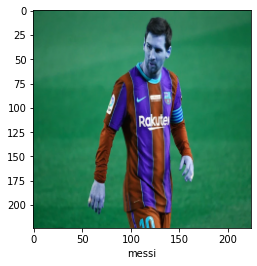

In [32]:
plot_labal(xtest,ytest,1)

In [33]:
ypred_class[0]

2

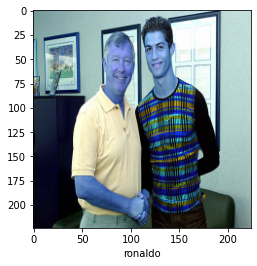

In [34]:
plot_labal(xtest,ytest,6)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
print('classification_report \n' ,classification_report(ytest,ypred_class))




classification_report 
               precision    recall  f1-score   support

           0       0.45      0.48      0.47        29
           1       0.69      0.69      0.69        35
           2       0.55      0.50      0.52        34
           3       0.72      0.74      0.73        31

    accuracy                           0.60       129
   macro avg       0.60      0.60      0.60       129
weighted avg       0.60      0.60      0.60       129

